In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("E:\\Projects\\Finance analysis\\Finance.xlsx")

In [3]:
df.head()

,date,month,day of week,amount,description
0,31,March,Monday,-546,Cafe with viana at pasha
1,31,March,Monday,-99,Grocery supermarket
2,31,March,Monday,273,Viana's share paid back
3,31,March,Monday,5000,Mom eidi
4,30,March,Sunday,-85,Gas


*  making column type to seperate income vs expenses

In [4]:
df['type'] = df['amount'].apply(lambda x: 'income' if x > 0 else 'expense' )

* making values in amount column abs

In [5]:
df['amount'] = df['amount'].abs()

In [6]:
import re
import unicodedata

# Clean text (lowercase + remove accents)
def normalize_text(text):
    text = str(text).lower()
    text = ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c))
    return text.strip()


In [7]:
mapping = {
    # Food & Drink
    r"(cafe|café|coffee|pizza|icecream|lunch|food)": ("Food & Drink", "Cafe / Coffee"),
    r"(snack)": ("Food & Drink", "Snacks"),
    r"(cake)": ("Food & Drink", "Cake"),
    r"(Debt)": ("Food & Drink", "Cafe / Coffee"),

    #Groceries
    r"(supermarket|naan land|snapmarket|ghedmat)": ("Groceries", "Supermarket"),
    r"(fruits|bannana)": ("Groceries", "Fruits & veggies"),
    r"(Grocery)": ("Groceries", "Fruits & veggies"),
    r"(meat)": ("Groceries", "Protein"),
    
    # Transport
    r"\b(gas|fuel)\b": ("Transport", "Fuel / Gas"),
    r"\b(sarigasht|taxi|uber|Tehran)\b": ("Transport", "Ride-hailing"),
    r"\b(snapp|metro)\b": ("Transport", "snapp"),


    # Utilities & Bills
    r"(irancell|internet|data)": ("Utilities & Bills", "Internet / Mobile Data"),
    r"(electricity)": ("Utilities & Bills", "Electricity"),
    r"(vpn)": ("Utilities & Bills", "VPN"),
    r"(chat GPT)": ("Utilities & Bills", "GPT"),

    # Housing
    r"(home|maintenance)": ("Housing", "Maintenance"),

    # Health
    r"(drug|medicine)": ("Health", "Medicine"),
    r"(doctor|hospital)": ("Health", "hospital costs"),

    # me time
    r"(gelish)": ("Myself", "Nails"),
    r"(essentials)": ("Myself", "Essentials"),
    r"(sm)": ("myself", "Snacks"),
    r"(Gym)": ("myself", "Gym"),
    
    # Shopping
    r"(pants|clothes|cloth|zhikan)": ("Shopping", "Clothes"),
    r"(bought|brecelate|Necklace)": ("Shopping", "others"),
    r"(books?)": ("Shopping", "Books"),
    r"(Digikala)": ("Shopping", "Digikala"),

    # Entertainment
    r"(netflix|spotify|subscription)": ("Entertainment", "Subscriptions"),
    r"(movie|cinema|event|musuem)": ("Entertainment", "Movies, Events"),

    # Gifts / Donations
    r"(gift|eidi)": ("Gifts/Donations", "Family/Friends"),

    # Income
    r"\b(Yaraneh)\b": ("Income", "Yaraneh"),
    r"\b(Profit)\b": ("Income", "Profit"),
    r"(income)": ("Income", "income"),
    r"(share paid back|parents)": ("Income", "Reimbursements"),
}


In [8]:
def normalize_text(text):
    # Lowercase + strip leading/trailing spaces
    return text.lower().strip()

def categorize(desc):
    desc = normalize_text(desc)

    # Rule 1: if "paidback" is in description → reimbursement only
    if re.search(r"\bpaidback\b", desc, re.IGNORECASE):
        return pd.Series(["Reimbursement", "Reimbursement"])

    # Rule 2: otherwise check mapping patterns (case-insensitive)
    for pattern, (cat, subcat) in mapping.items():
        if re.search(pattern, desc, re.IGNORECASE):
            return pd.Series([cat, subcat])

    # Default fallback
    return pd.Series(["Other", "Other"])



In [9]:
df[['category', 'sub_category']] = df['description'].apply(categorize)

In [10]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category
0,31,March,Monday,546,Cafe with viana at pasha,expense,Food & Drink,Cafe / Coffee
1,31,March,Monday,99,Grocery supermarket,expense,Groceries,Supermarket
2,31,March,Monday,273,Viana's share paid back,income,Income,Reimbursements
3,31,March,Monday,5000,Mom eidi,income,Gifts/Donations,Family/Friends
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas


In [11]:
df[270:330]

,date,month,day of week,amount,description,type,category,sub_category
270,3,August,Sunday,57,income profit,income,Income,Profit
271,5,August,Tuesday,425,gelish,expense,Myself,Nails
272,6,August,Wednesday,349,debt to navid for café,expense,Food & Drink,Cafe / Coffee
273,6,August,Wednesday,356,debt to tara for bakeroom,expense,Food & Drink,Cafe / Coffee
274,6,August,Wednesday,73,naan land,expense,Groceries,Supermarket
275,6,August,Wednesday,265,supermarket,expense,Groceries,Supermarket
276,6,August,Wednesday,60,?,expense,Other,Other
277,7,August,Thursday,194,fruits,expense,Groceries,Fruits & veggies
278,7,August,Thursday,251,supermarket,expense,Groceries,Supermarket
279,7,August,Thursday,2300,meat,expense,Groceries,Protein


* creating proper date time

In [12]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category
0,31,March,Monday,546,Cafe with viana at pasha,expense,Food & Drink,Cafe / Coffee
1,31,March,Monday,99,Grocery supermarket,expense,Groceries,Supermarket
2,31,March,Monday,273,Viana's share paid back,income,Income,Reimbursements
3,31,March,Monday,5000,Mom eidi,income,Gifts/Donations,Family/Friends
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas


In [13]:
# Create a combined datetime column with year = 2025
df["datetime"] = pd.to_datetime(
    df["date"].astype(str) + " " + df["month"] + " 2025",
    format="%d %B %Y"
)

In [14]:
df[20:30]

,date,month,day of week,amount,description,type,category,sub_category,datetime
20,3,April,Thursday,180,poopak share from café paidback,income,Reimbursement,Reimbursement,2025-04-03
21,4,April,Friday,140,asal share from café,income,Food & Drink,Cafe / Coffee,2025-04-04
22,4,April,Friday,735,café with guys,expense,Food & Drink,Cafe / Coffee,2025-04-04
23,4,April,Friday,454,café with viana nightvan,expense,Food & Drink,Cafe / Coffee,2025-04-04
24,5,April,Saturday,129,Irancell home,expense,Utilities & Bills,Internet / Mobile Data,2025-04-05
25,6,April,Sunday,53,irancell data,expense,Utilities & Bills,Internet / Mobile Data,2025-04-06
26,6,April,Sunday,157,Viana's share paid back,income,Income,Reimbursements,2025-04-06
27,7,April,Monday,482,Books,expense,Shopping,Books,2025-04-07
28,7,April,Monday,6400,Income Amo mos,income,Income,income,2025-04-07
29,7,April,Monday,497,Café mora with nazanin,expense,Food & Drink,Cafe / Coffee,2025-04-07


* Standarized text

In [15]:
df["category"] = df["category"].str.title().str.strip()
df["sub_category"] = df["sub_category"].str.title().str.strip()
df["description"] = df["description"].str.title().str.strip()

# EDA

* Step 1. General overview
* Shape of the data:

In [16]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30


In [17]:
df.shape

(315, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          315 non-null    int64         
 1   month         315 non-null    object        
 2   day of week   315 non-null    object        
 3   amount        315 non-null    int64         
 4   description   315 non-null    object        
 5   type          315 non-null    object        
 6   category      315 non-null    object        
 7   sub_category  315 non-null    object        
 8   datetime      315 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 22.3+ KB


In [51]:
print(df.describe())

             date       amount                       datetime  signed_amount
count  315.000000   315.000000                            315     315.000000
mean    16.044444   450.634921  2025-06-04 23:41:42.857142784      16.374603
min      1.000000    20.000000            2025-03-28 00:00:00   -2900.000000
25%      9.000000    65.500000            2025-04-25 00:00:00    -250.000000
50%     16.000000   129.000000            2025-05-30 00:00:00    -100.000000
75%     23.000000   373.000000            2025-07-14 00:00:00     -45.500000
max     31.000000  7000.000000            2025-08-24 00:00:00    7000.000000
std      8.529338  1028.411673                            NaN    1122.978248


In [52]:
median_expense = df.loc[df['type'] == 'expense', 'amount'].median()
print(median_expense)

120.0


In [53]:
median_income = df.loc[df['type'] == 'income', 'amount'].median()
print(median_income)

400.0


* Time coverage: min & max dates.

In [19]:
print('Start date of project: ', df['datetime'].min())
print('End date of project: ', df['datetime'].max())

Start date of project:  2025-03-28 00:00:00
End date of project:  2025-08-24 00:00:00


* Total expenses vs income, net balance.

In [20]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30


In [21]:
total_exp = df.loc[df['type']=="expense", "amount"].sum()
total_inc = df.loc[df['type']=="income", "amount"].sum()
net = total_inc - total_exp

print(f'total expenses equal to: {total_exp}000 Toman')
print(f'total income equals to: {total_inc}000 Toman')
print(f'total net equals to: {net}000 Toman')

avg_exp = round(df.loc[df['type']=="expense", "amount"].mean())
ave_inc = round(df.loc[df['type']=="income", "amount"].mean())
print(f'\nAverage expense is : {avg_exp}000 Toman')
print(f'Average income is : {ave_inc}000 Toman')

total expenses equal to: 68396000 Toman
total income equals to: 73554000 Toman
total net equals to: 5158000 Toman

Average expense is : 251000 Toman
Average income is : 1711000 Toman


* top 10 expenses

In [22]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30


In [23]:
# Top 10 biggest expenses
top_expenses = df[df['type']=="expense"].nlargest(10, 'amount')[['datetime','category','sub_category','amount','description']]
print(top_expenses)

      datetime   category sub_category  amount       description
311 2025-08-24  Groceries  Supermarket    2900           Ghedmat
279 2025-08-07  Groceries      Protein    2300              Meat
259 2025-07-25   Shopping      Clothes    1919      Cloth Zhikan
218 2025-07-03     Myself          Gym    1800               Gym
137 2025-05-22     Myself          Gym    1500         Viana Gym
145 2025-05-25     Myself          Gym    1500               Gym
69  2025-04-22     Myself          Gym    1400               Gym
229 2025-07-12      Other        Other    1393  Skincare For Mom
10  2025-03-28   Shopping      Clothes    1341    Pants From Bqb
285 2025-08-12     Myself          Gym    1200               Gym


* Step 2 Trends over time

Text(0.5, 0, 'Month')

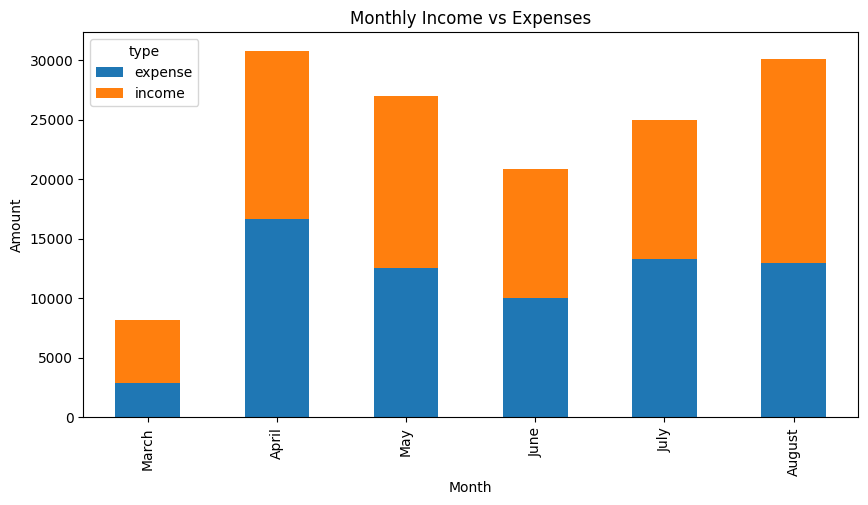

In [24]:
# Group by your 'month' column instead of datetime
monthly = df.groupby(['month', 'type'])['amount'].sum().unstack(fill_value=0)

# Reorder months properly if needed (otherwise they'll sort alphabetically)
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly = monthly.reindex(month_order).dropna(how="all")

# Plot
monthly.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Monthly Income vs Expenses")
plt.ylabel("Amount")
plt.xlabel("Month")

In [25]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30


Text(0, 0.5, 'Net Balance')

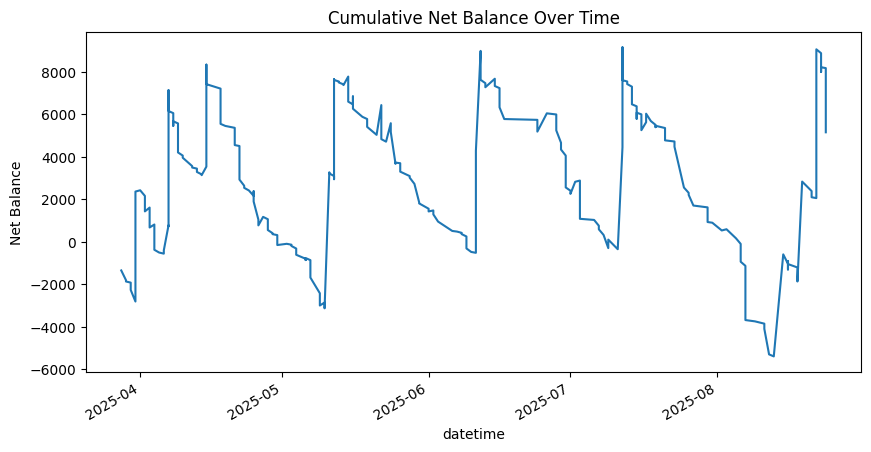

In [26]:
# Cumulative net balance
df['signed_amount'] = df.apply(lambda r: -r['amount'] if r['type']=="expense" else r['amount'], axis=1)
df_sorted = df.sort_values('datetime')
df_sorted['cumulative_net'] = df_sorted['signed_amount'].cumsum()

df_sorted.plot(x='datetime', y='cumulative_net', figsize=(10,5), legend=False)
plt.title("Cumulative Net Balance Over Time")
plt.ylabel("Net Balance")


* Step 3. Breakdown by category/subcategory

In [27]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


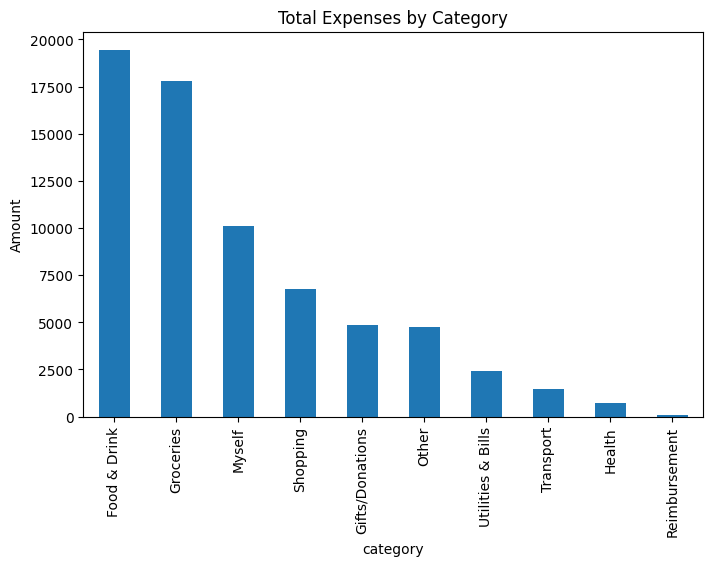

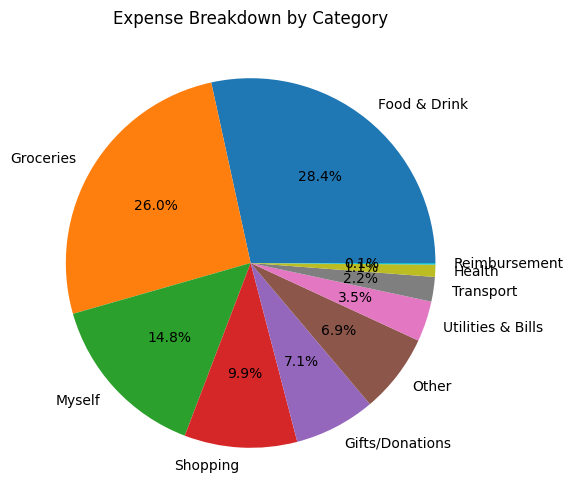

category           sub_category          
Food & Drink       Cafe / Coffee             17674
Groceries          Fruits & Veggies           8389
Myself             Gym                        7400
Groceries          Supermarket                7104
Shopping           Clothes                    5252
Gifts/Donations    Family/Friends             4859
Other              Other                      4746
Groceries          Protein                    2300
Food & Drink       Cake                       1765
Utilities & Bills  Internet / Mobile Data     1641
Myself             Nails                      1570
                   Snacks                     1079
Shopping           Digikala                    767
Transport          Snapp                       747
Utilities & Bills  Vpn                         660
Name: amount, dtype: int64


In [28]:
# Goal: find what categories dominate.
cat_totals = df[df['type']=="expense"].groupby('category')['amount'].sum().sort_values(ascending=False)

cat_totals.plot(kind='bar', figsize=(8,5))
plt.title("Total Expenses by Category")
plt.ylabel("Amount")
plt.show()

# Category shares
cat_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Expense Breakdown by Category")
plt.ylabel("")
plt.show()

# Subcategories
subcat_totals = df[df['type']=="expense"].groupby(['category','sub_category'])['amount'].sum().sort_values(ascending=False)
print(subcat_totals.head(15))


* Step 4. Time patterns

In [29]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


Text(0, 0.5, 'Avg Expense')

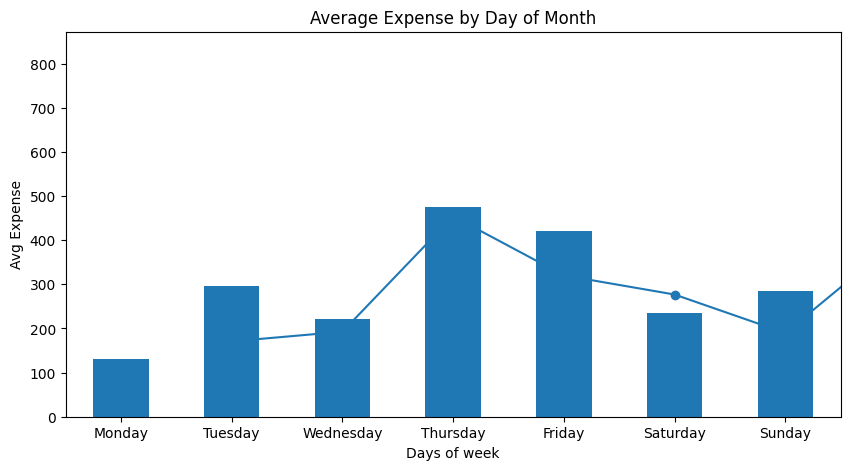

In [30]:
# Day of week
df['day of week'] = df['datetime'].dt.day_name()
dow = df[df['type']=="expense"].groupby('day of week')['amount'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

dow.plot(kind='bar', figsize=(8,5))
plt.title("Average Daily Expense by Day of Week")
plt.ylabel("Avg Expense")

# Day of month
dom = df[df['type']=="expense"].groupby(df['datetime'].dt.day)['amount'].mean()
dom.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Average Expense by Day of Month")
plt.xlabel("Days of week")
plt.ylabel("Avg Expense")


* Step 5. Transaction distribution

In [31]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Food & Drink'),
  Text(2, 0, 'Gifts/Donations'),
  Text(3, 0, 'Groceries'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Income'),
  Text(6, 0, 'Myself'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Reimbursement'),
  Text(9, 0, 'Shopping'),
  Text(10, 0, 'Transport'),
  Text(11, 0, 'Utilities & Bills')])

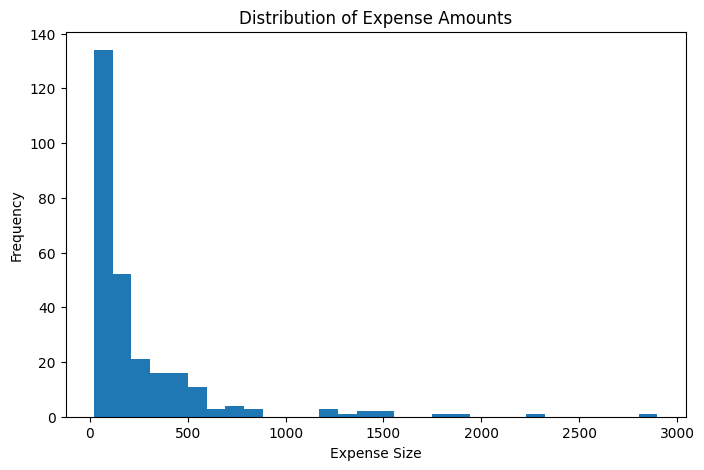

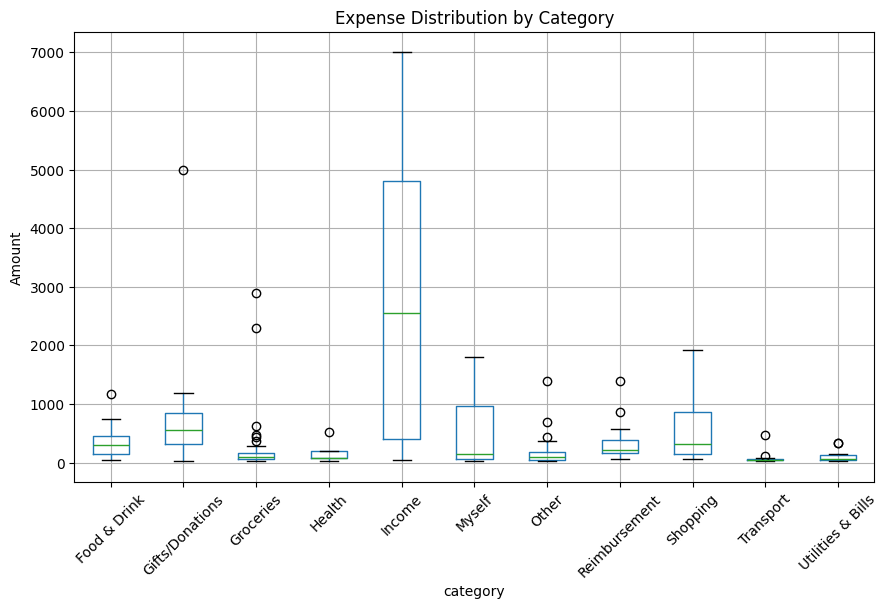

In [32]:
# Histogram
df[df['type']=="expense"]['amount'].plot(kind='hist', bins=30, figsize=(8,5))
plt.title("Distribution of Expense Amounts")
plt.xlabel("Expense Size")

# Boxplot by category
df.boxplot(column='amount', by='category', figsize=(10,6))
plt.title("Expense Distribution by Category")
plt.suptitle("")
plt.ylabel("Amount")
plt.xticks(rotation=45)


* Recurring expenses

* Step 8. Interesting extras

In [33]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


Text(0.5, 1.0, 'Heatmap: Expenses by Weekday & Month')

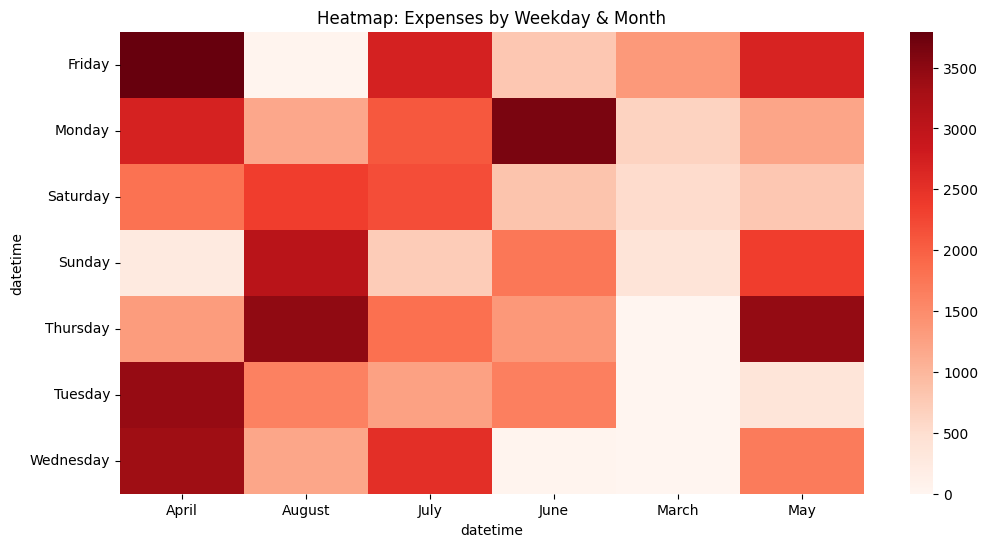

In [34]:
# Heatmap: spend by weekday x month
import seaborn as sns

pivot = df[df['type']=="expense"].pivot_table(
    index=df['datetime'].dt.day_name(),
    columns=df['datetime'].dt.month_name(),
    values='amount',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=False, cmap="Reds")
plt.title("Heatmap: Expenses by Weekday & Month")

In [35]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


In [36]:
analysis = {}

# 1) Monthly savings rate
monthly = df.pivot_table(index=df["datetime"].dt.to_period("M"), 
                         columns="type", values="amount", aggfunc="sum", fill_value=0)
if "expense" not in monthly: monthly["expense"]=0.0
if "income" not in monthly: monthly["income"]=0.0
monthly["net"] = monthly["income"] - monthly["expense"]
monthly["savings_rate_%"] = np.where(monthly["income"]>0,
                                     (monthly["net"]/monthly["income"]*100).round(1),
                                     np.nan)
analysis["monthly_savings"] = monthly
print("== Monthly Savings Rate ==")
display(monthly)

== Monthly Savings Rate ==


type,expense,income,net,savings_rate_%
datetime,,,,
2025-03,2903,5273,2370,44.9
2025-04,16662,14146,-2516,-17.8
2025-05,12535,14494,1959,13.5
2025-06,10057,10808,751,6.9
2025-07,13313,11653,-1660,-14.2
2025-08,12926,17180,4254,24.8


In [37]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


In [38]:
# 3) Top 3 categories
cat_totals = (df[df["type"]=="expense"]
              .groupby("category")["amount"]
              .sum()
              .sort_values(ascending=False))
top3 = cat_totals.head(3)
share_top3 = top3.sum()/cat_totals.sum()*100 if cat_totals.sum()>0 else 0
analysis["top3_categories"] = top3
print("\n== Top 3 Categories ==")
display(top3.to_frame("total"))
print(f"Together they account for {share_top3:.1f}% of all expenses.")


== Top 3 Categories ==


,total
category,
Food & Drink,19439
Groceries,17793
Myself,10099


Together they account for 69.2% of all expenses.


In [39]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


In [40]:

# 4) Best category to cut by 10%
# Find category with largest savings potential
potential_savings = (cat_totals*0.10).sort_values(ascending=False)
analysis["cut_10pct_potential"] = potential_savings
print("\n== Potential Savings by Cutting 10% ==")
display(potential_savings.to_frame("save_10pct"))
print(f"Biggest potential: Cut 10% of '{potential_savings.index[0]}' → save {potential_savings.iloc[0]:,.2f}")


== Potential Savings by Cutting 10% ==


,save_10pct
category,
Food & Drink,1943.9
Groceries,1779.3
Myself,1009.9
Shopping,674.4
Gifts/Donations,485.9
Other,474.6
Utilities & Bills,242.1
Transport,147.1
Health,72.6


Biggest potential: Cut 10% of 'Food & Drink' → save 1,943.90


In [41]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


In [43]:
# 5) Top 10 biggest transactions
top10 = (df[df["type"]=="expense"]
         .nlargest(10,"amount")[["datetime","category","sub_category","amount","description"]])
share_top10 = top10["amount"].sum()/df.loc[df["type"]=="expense","amount"].sum()*100 if not top10.empty else 0
analysis["top10_expenses"] = top10
print("\n== Top 10 Expenses ==")
display(top10.assign(amount=top10["amount"].map("{:,.2f}".format)))
print(f"These 10 transactions represent {share_top10:.1f}% of all expenses.")



== Top 10 Expenses ==


,datetime,category,sub_category,amount,description
311,2025-08-24,Groceries,Supermarket,"2,900.00",Ghedmat
279,2025-08-07,Groceries,Protein,"2,300.00",Meat
259,2025-07-25,Shopping,Clothes,"1,919.00",Cloth Zhikan
218,2025-07-03,Myself,Gym,"1,800.00",Gym
137,2025-05-22,Myself,Gym,"1,500.00",Viana Gym
145,2025-05-25,Myself,Gym,"1,500.00",Gym
69,2025-04-22,Myself,Gym,"1,400.00",Gym
229,2025-07-12,Other,Other,"1,393.00",Skincare For Mom
10,2025-03-28,Shopping,Clothes,"1,341.00",Pants From Bqb
285,2025-08-12,Myself,Gym,"1,200.00",Gym


These 10 transactions represent 25.2% of all expenses.


In [44]:
df.head()

,date,month,day of week,amount,description,type,category,sub_category,datetime,signed_amount
0,31,March,Monday,546,Cafe With Viana At Pasha,expense,Food & Drink,Cafe / Coffee,2025-03-31,-546
1,31,March,Monday,99,Grocery Supermarket,expense,Groceries,Supermarket,2025-03-31,-99
2,31,March,Monday,273,Viana'S Share Paid Back,income,Income,Reimbursements,2025-03-31,273
3,31,March,Monday,5000,Mom Eidi,income,Gifts/Donations,Family/Friends,2025-03-31,5000
4,30,March,Sunday,85,Gas,expense,Transport,Fuel / Gas,2025-03-30,-85


In [46]:
# Select only the columns you want
export_cols = ["datetime", "day of week", "category", "sub_category", "amount", "description"]

# Make sure they exist in your dataframe
missing = [c for c in export_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in df: {missing}")

# Create a cleaned copy
df_cleaned = df[export_cols].copy()

# Save to CSV (no index)
df_cleaned.to_csv("daily_costs_cleaned.csv", index=False)

print("✓ Cleaned dataset exported to 'daily_costs_cleaned.csv'")


✓ Cleaned dataset exported to 'daily_costs_cleaned.csv'


In [47]:
df_cleaned.duplicated().sum()

np.int64(2)

In [48]:
df_cleaned.isna().sum()

datetime        0
day of week     0
category        0
sub_category    0
amount          0
description     0
dtype: int64